# Datan visualisointi käytetyistä energialähteistä Euroopassa

Tässä Jupyter-notebookissa koodi ja tekstisisältö on jaoteltu lohkoittain. Lohkoja on mahdollista ajaa askel kerrallaan järjestyksessä painamalla näppäimiä [shift] + [enter]

Muista edetä järjestyksessä, koska osa koodista voi olla riippuvaista koodista joka on kirjoitettu aiempaan lohkoon!

In [2]:
# Aloitetaan lataamalla käytettävä data EU:lta
!curl --insecure "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/nrg_cb_pem?format=SDMX-CSV&compressed=false" > estat_nrg_cb_pem_en.csv
!curl --insecure "https://dd.eionet.europa.eu/vocabulary/eurostat/siec/csv" > siec.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4813k    0 4813k    0     0  1045k      0 --:--:--  0:00:04 --:--:-- 1195k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37471    0 37471    0     0  18000      0 --:--:--  0:00:02 --:--:-- 18006


In [ ]:
# Asetetaan taulukot näkymään vasemmalla
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [3]:
# Tuodaan tarvittavat kirjastot datan käsittelyä varten
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None) # Poistetaan pandas kirjaston maksimi sarakkeen pituus

In [4]:
# Tallennetaan energiadata muuttujaan "data"
data = pd.read_csv("estat_nrg_cb_pem_en.csv")
# Tallennetaan SIEC koodit, jotka kertovat meille mistä energialähteestä on kyse
codes = pd.read_csv("siec.csv")

In [ ]:
# Tutustutaan dataan tulostamalla sen 5 ensimmäistä riviä
data.head()

,DATAFLOW,LAST UPDATE,freq,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_CB_PEM(1.0),05/01/24 23:00:00,M,C0000,GWH,AL,2018-01,0.0,NaN
1,ESTAT:NRG_CB_PEM(1.0),05/01/24 23:00:00,M,C0000,GWH,AL,2018-02,0.0,NaN
2,ESTAT:NRG_CB_PEM(1.0),05/01/24 23:00:00,M,C0000,GWH,AL,2018-03,0.0,NaN
3,ESTAT:NRG_CB_PEM(1.0),05/01/24 23:00:00,M,C0000,GWH,AL,2018-04,0.0,NaN
4,ESTAT:NRG_CB_PEM(1.0),05/01/24 23:00:00,M,C0000,GWH,AL,2018-05,0.0,NaN


Valitse oma maa!


| Maa | Maa koodi |
| --- | --- |
| FI | Suomi |
| SE | Ruotsi |
| NO | Norja |
| DK | Tanska |
| DE | Saksa |
| FR | Ranska |
| ES | Espanja |
| PT | Portugali |
| IT | Italia |
| PL | Puola |
| EE | Viro |
| LT | Latvia |
| AT | Itävalta |
| CZ | Tsekki |
| BE | Belgia |
| EL | Kreikka |
| NL | Hollanti
| TR | Turkki |
| IR | Irlanti |

In [5]:
# Valitaan oma maa ja tallennetaan sen maa koodi muuttujaan. Muista ""-merkit
maa = "FI"
# Tuodaan maan data meidän energia datasta ja tallennetaan se muuttujaan
maa_data = data.loc[data["geo"] == maa]
maa_data.loc[:,'TIME_PERIOD'] = pd.to_datetime(maa_data['TIME_PERIOD'])

<ipython-input-5-fbc1cdaaeb45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maa_data.loc[:,'TIME_PERIOD'] = pd.to_datetime(maa_data['TIME_PERIOD'])
<ipython-input-5-fbc1cdaaeb45>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  maa_data.loc[:,'TIME_PERIOD'] = pd.to_datetime(maa_data['TIME_PERIOD'])


# 1.Uusiutuvat energialähteet: Aurinkoenergia vs Tuulivoima
Tutustutaan uusiutuviin energialähteisiin vertaamalla paljonko aurinkoenergiaa ja tuulivoimaa eri Euroopan maissa tuotetaan

## 1.1 Piirretään kuvaaja tuotetusta **tuulivoimasta** ajan suhteen

In [ ]:
# Alustetaan kuvaaja.
fig, ax1 = plt.subplots(figsize=(12, 8))

# Määritetään kuvaajan väri.
color = 'tab:red'

# Lisätään x ja y-akseleille otsikot!
ax1.set_xlabel("Päivämäärä")
ax1.set_ylabel("GWH (Tuuli)", color=color)

# Luodaan kuvaaja annetusta datasta
tuuli_line, = ax1.plot(maa_data.loc[maa_data["siec"] == "RA300"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "RA300"].OBS_VALUE, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0) # Määritetään 0 y-akselin minimiksi


plt.legend([tuuli_line], ['Tuuli']) # Lisätään viivalle otsikko
plt.title(f"{maa}: Tuuli (RA300)") # Lisätään koko kuvaajalle otsikko
plt.show() # Tulostetaan kuvaaja

## **Kysymykset**
1. Miltä yllä oleva kuvaaja tuulivoimasta näyttää?

2. Miten tuulivoiman määrä kehittyy ajan suhteen?

3. Miten vuodenajat vaikuttaa energian määrään?

4. Mikä on korkein ja matalin arvo GWH:ssa?

## 1.2 Piirretään kuvaaja tuotetusta **aurinkoenergiasta** ajan suhteen

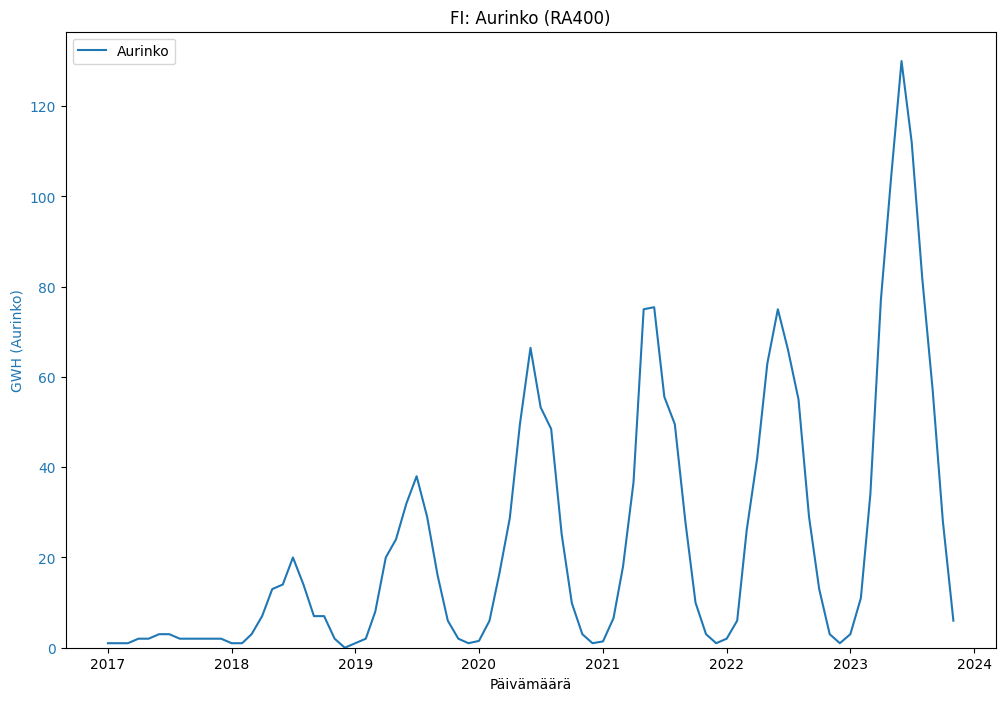

In [7]:
# Alustetaan kuvaaja.
fig, ax1 = plt.subplots(figsize=(12, 8))

# Määritetään kuvaajan väri
color = 'tab:blue'

# Lisätään x ja y-akseleille otsikot!
ax1.set_xlabel("Päivämäärä")
ax1.set_ylabel("GWH (Aurinko)", color=color)

# Luodaan kuvaaja annetusta datasta
aurinko_line, = ax1.plot(maa_data.loc[maa_data["siec"] == "RA400"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "RA400"].OBS_VALUE, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0) # Määritetään 0 y-akselin minimiksi

plt.legend([aurinko_line], ['Aurinko']) # Lisätään viivalle otsikko
plt.title(f"{maa}: Aurinko (RA400)") # Lisätään koko kuvaajalle otsikko
plt.show() # Tulostetaan kuvaaja

## **Kysymykset**

1. Miltä yllä oleva kuvaaja aurinkoenergiasta näyttää?

2. Miten aurinkoenergian määrä kehittyy ajan suhteen?

3. Miten vuodenajat vaikuttavat energian määrään?

4. Mikä on korkein ja matalin arvo GWH:ssa?


## 1.3 Verrataan tuotettua aurinkoenergia ja tuulivoima toisiinsa
Huomataan, että yllä olevat kuvaajat ovat hieman haastavia tulkita, sillä ne ovat erillisiä graafeja, joten piirretäänkin nämä datat samaan graafiin.

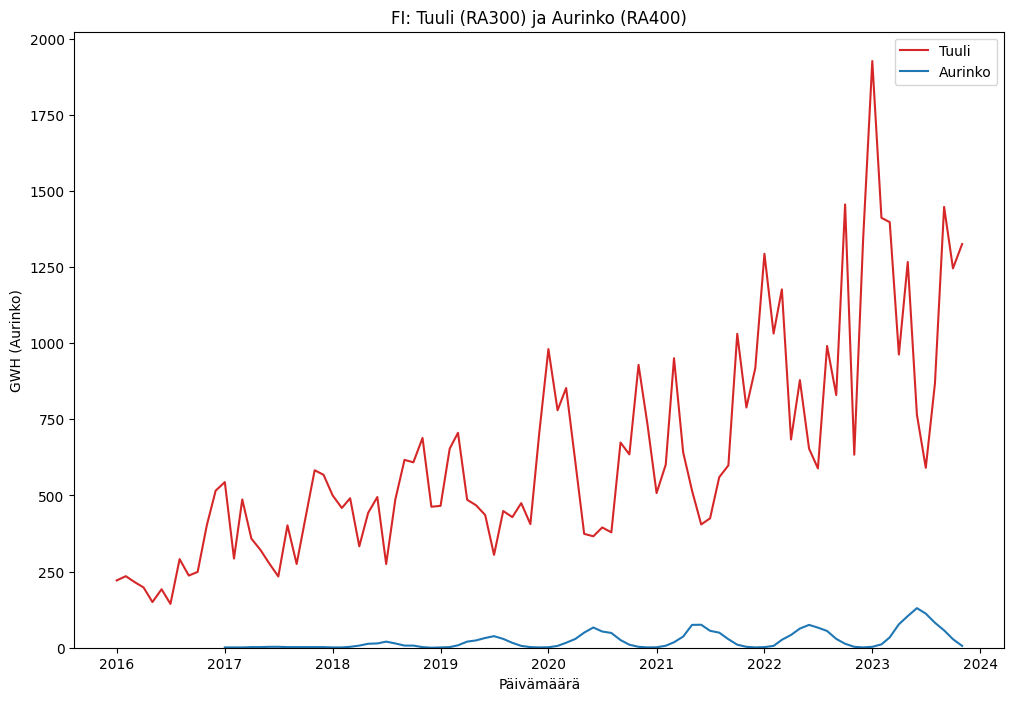

In [8]:
# Alustetaan kuvaaja.
fig, ax1 = plt.subplots(figsize=(12, 8))


# Määritetään ensimmäisen kuvaajan väri.
color = 'tab:red'

# Lisätään x ja y-akseleille otsikot!
ax1.set_xlabel("Päivämäärä")
ax1.set_ylabel("GWH (Tuuli)")

# Luodaan ensimmäinen kuvaaja annetusta datasta
tuuli_line, = ax1.plot(maa_data.loc[maa_data["siec"] == "RA300"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "RA300"].OBS_VALUE, color=color)
ax1.tick_params(axis='y')

# Määritetään toisen kuvaajan väri.
color = 'tab:blue'

# Luodaan ensimmäinen kuvaaja annetusta datasta
ax1.set_ylabel("GWH (Aurinko)")
aurinko_line, = ax1.plot(maa_data.loc[maa_data["siec"] == "RA400"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "RA400"].OBS_VALUE, color=color)
ax1.tick_params(axis='y')

plt.title(f"{maa}: Tuuli (RA300) ja Aurinko (RA400)")# Lisätään koko kuvaajalle otsikko
ax1.set_ylim(bottom=0) # Määritetään 0 y-akselin minimiksi
ax1.legend([tuuli_line, aurinko_line], ['Tuuli', 'Aurinko'])# Lisätään viivoille otsikot

plt.show() # Tulostetaan kuvaaja

## **Kysymykset**
1. Mitä eroja on tuulivoiman ja aurinkovoiman välillä?

2. Sopiiko käytetty skaala yllä olevaan kuvaajaan?


## 1.4 Skaalaus ja tulosten tarkkailu
Nyt dataa alkaa olemaan jo helpompi tarkkailla, mutta huomaamme että tuulivoimaa ja aurinkoenergiaa on haastava verrata sillä tuulivoimaa on huomattavasti enemän kuin aurinkoenergiaa. Piirretäänkin seuraavaksi nämä kuvaajat vielä eri skaaloille!

In [ ]:
# Alustetaan kuvaaja.
fig, ax1 = plt.subplots(figsize=(12, 8))

# Määritetään ensimmäisen kuvaajan väri.
color = 'tab:red'

# Lisätään x ja y-akseleille otsikot!
ax1.set_xlabel("Päivämäärä")
ax1.set_ylabel("GWH (Tuuli)", color=color)

# Luodaan ensimmäinen kuvaaja annetusta datasta
tuuli_line, = ax1.plot(maa_data.loc[maa_data["siec"] == "RA300"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "RA300"].OBS_VALUE, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0) # Määritetään 0 y-akselin minimiksi

# Luodaan toinen kuvaaja ja toinen akselisto
ax2 = ax1.twinx()

# Määritetään toisen kuvaajan väri.
color = 'tab:blue'

# Lisätään toisen kuvaajan y-akselille otsikko
ax2.set_ylabel("GWH (Aurinko)", color=color)

# Luodaan toinen kuvaaja annetusta datasta
aurinko_line, = ax2.plot(maa_data.loc[maa_data["siec"] == "RA400"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "RA400"].OBS_VALUE, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0) # Määritetään 0 y-akselin minimiksi

plt.title(f"{maa}: (RA300) ja Aurinko (RA400)") # Lisätään koko kuvaajalle otsikko
ax1.legend([tuuli_line, aurinko_line], ['Tuuli', 'Aurinko']) # Lisätään viivoille otsikot
plt.show() # Tulostetaan kuvaaja

Nyt voimme tarkkailla molempia datoja samassa kuvaajassa mutta itsenäisillä skaaloilla.

## **Kysymykset**

1. Miten tuotettu tuulienergia eroaa tuotetusta aurinkoenergiasta GWH määrässä?

2. Miten tuotetut energiat vaihtelevat vuodenajan mukaan?

3. Entäs miten energioiden tuotanto kehittyy ajan mukaan?

4. Sopiiko nämä skaalat paremmin kuvaajaan? Miten kuvaajaa voisi vielä kehittää?


## 1.5 Tulosten vertailu eri maiden välillä
Vertailkaa teidän kuvaajia kaverin kanssa, joka on tarkastellut eri maan energiatuotantoa.

## **Kysymykset**

1. Miten teidän kuvaajat eroavat esim. kehityksessä ajan mukaan ja vuodenaikavaihteluissa energiantuotannossa?

2. Missä maassa käytetään enemmän aurinkoenergiaa ja missä tuulienergiaa?

3. Mikä voisi olla syy näihin eroihin?

# 2. Kaikki käytetyt energialähteet Euroopassa
Verrataan koko Euroopassa käytetyt energialähteet tiettyyn maahan luomalla kategorisia histogrammeja.

### Alla oleva koodi piirtää kuvaajan kaikesta datastamme

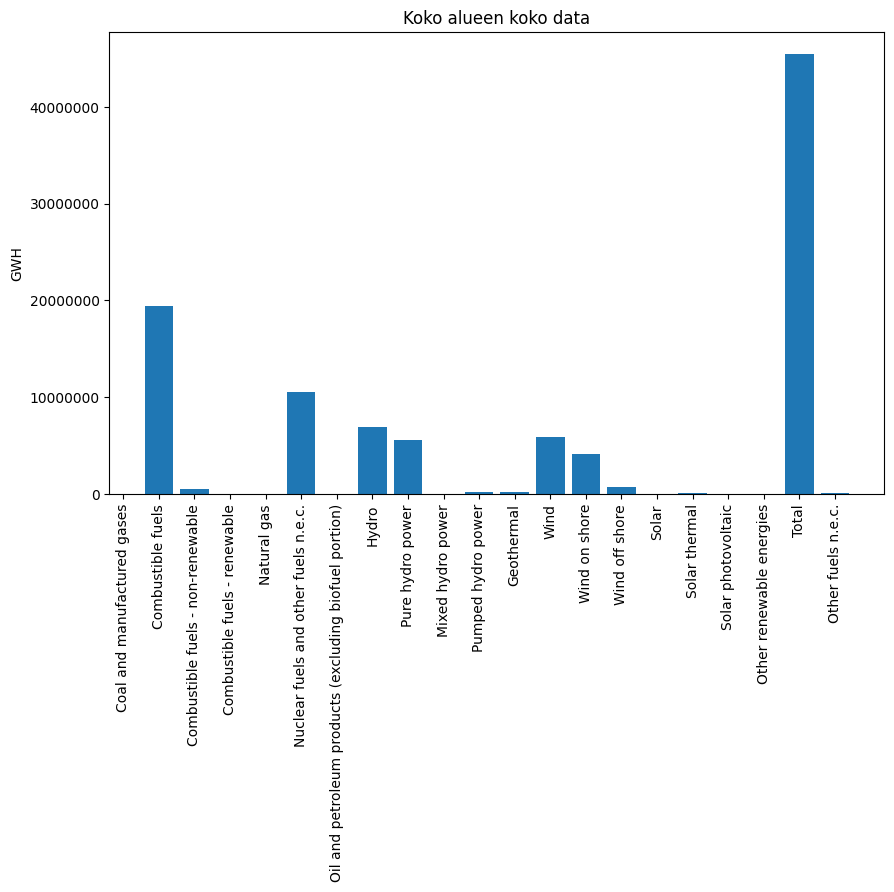

In [9]:
# Alustetaan muuttujat
tot_all = {}
date_all = []
koodit = []

# Alustetaan dictionary uniikeilla siec koodeilla
for i in data["siec"].unique():
    tot_all[i] = 0

# Täytetään siec koodien dictionary ja päivämää lista datalla
for index, j in data.iterrows():
    tot_all[j.get(key = "siec")] += float(j.get(key = "OBS_VALUE"))
    date_all.append(j.get(key = "TIME_PERIOD"))


# Lisätään koodit listaan siec koodien selitykset
for i in list(tot_all.keys()):
    koodit.append(codes.loc[codes["Notation"] == i]["Label"].to_string(index=False))

# Alustetaan kuvaaja
fig, ax = plt.subplots(figsize=(10, 6))

# Luodaan pylväsdiagrammi käsitellystä datasta
ax.bar(koodit, list(tot_all.values()))

ax.set_title(f"Koko alueen koko data")  # Lisätään koko kuvaajalle otsikko
ax.set_ylabel("GWH") # Lisätään y-akselille otsikko
plt.xticks(rotation=90) # Käännettään x-akselin otsikot
plt.ticklabel_format(style='plain', axis='y') # Poistetaan tieteellinen notaatio käytöstä, jotta saamme vertailukepoisia numeroita

plt.show() # Tulostetaan kuvaaja

### Alla piirretään kuvaaja valitsemastamme maasta. Koodi muistaa maavalinnan, sillä se on tallennettu muuttujaan.

In [ ]:
# Alustetaan muuttujat
tot = {}
date = []
koodit_lista = []

# Alustetaan dictionary uniikeilla siec koodeilla
for i in maa_data["siec"].unique():
    tot[i] = 0


# Täytetään siec koodien dictionary ja päivämää lista datalla
for index, j in maa_data.iterrows():
    tot[j.get(key = "siec")] += float(j.get(key = "OBS_VALUE"))
    date.append(j.get(key = "TIME_PERIOD"))

# Lisätään koodit listaan siec koodien selitykset
for i in list(tot.keys()):
    koodit_lista.append(codes.loc[codes["Notation"] == i]["Label"].to_string(index=False))

# Alustetaan kuvaaja
fig, ax = plt.subplots(figsize=(10, 6))

# Luodaan pylväsdiagrammi käsitellystä datasta
ax.bar(koodit_lista, list(tot.values()))

ax.set_title(f"{maa} eri energian lähteet {min(date).strftime('%d.%m.%Y')}-{max(date).strftime('%d.%m.%Y')}")  # Lisätään koko kuvaajalle otsikko
ax.set_ylabel("GWH") # Lisätään y-akselille otsikko
plt.xticks(rotation=90) # Käännettään x-akselin otsikot
plt.ticklabel_format(style='plain', axis='y') # Poistetaan tieteellinen notaatio käytöstä, jotta saamme vertailukepoisia numeroita

plt.show() # Tulostetaan kuvaaja

## **Kysymykset**

1. Miten histogrammi koko Euroopassa tuotetusta energiasta eroaa teidän maan dataan esim. GWH määrässä tai käytetyissä energialähteissä?

2. Miten histogrammi viime vuodesta eroaa histogrammin 2016- nykyhetkeen energiadatasta?

#3 .Tuotettu energia ajan suhteen
Valitse SIEC koodien listasta energialähde tarkasteltavaksi (toinen kuin aurinkoenergia ja tuulivoima sillä niitä tarkasteltiin jo 1.osassa)
Luo oma aika/ GWH kuvaaja valitusta maasta ja energialähteestä.
Hyödynnä koodia 1.osan tehtävästä.
Muista lisätä nimet x ja y-akselille ja koko kuvaajalle.

| **SIEC**       | **Selitys**                                            |
|----------------|--------------------------------------------------------|
| **C0000**      | Coal and manufactured gases                            |
| **CF**         | Combustible fuels                                      |
| **CF_NR**      | Combustible fuels - non-renewable                      |
| **CF_R**       | Combustible fuels - renewable                          |
| **G3000**      | Natural gas                                            |
| **N9000**      | Nuclear fuels and other fuels n.e.c.                   |
| **O4000XBIO**  | Oil and petroleum products (excluding biofuel portion) |
| **RA100**      | Hydro                                                  |
| **RA110**      | Pure hydro power                                       |
| **RA120**      | Mixed hydro power                                      |
| **RA130**      | Pumped hydro power                                     |
| **RA200**      | Geothermal                                             |
| **RA300**      | Wind                                                   |
| **RA310**      | Wind on shore                                          |
| **RA320**      | Wind off shore                                         |
| **RA400**      | Solar                                                  |
| **RA410**      | Solar thermal                                          |
| **RA420**      | Solar photovoltaic                                     |
| **RA500_5160** | Other renewable energies                               |
| **TOTAL**      | Total                                                  |
| **X9900**      | Other fuels n.e.c.                                     |


In [ ]:
# Muuta koodia, siten että luot kuvaajaan omasta maasta ja valitusta energialähteestä.

# Määritetään kuvaajan koko
fig, ax1 = plt.subplots(figsize=(12, 8))

# Määritetään kuvaajan väri. Kokeile vaihtaa viivan väriä!
color = 'tab:red'

# Lisää x ja y-akseleille otsikot!
ax1.set_xlabel("Lisää x-akselin otsikko")
ax1.set_ylabel("Lisää y-akselin otsikko", color=color)

# Luodaan kuvaaja energialähteen tuotetusta määrästä ajan suhteen
# Lisää SIEC koodi valitsemastasi energialähteestä "maa_data["siec"] ==" kohtien jälkeen
energia_line, = ax1.plot(maa_data.loc[maa_data["siec"] == "Kirjoita tähän valitun energiamuodon SIEC koodi"].TIME_PERIOD, maa_data.loc[maa_data["siec"] == "Kirjoita tähän valitun energiamuodon SIEC koodi"].OBS_VALUE, color=color)


ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0) # Määritetään 0 y-akselin minimiksi


plt.legend([energia_line], ['Lisää otsikko']) # Lisää viivalle otsikko
plt.title(f"{maa}: Lisää otsikko") # Lisää koko kuvaajalle otsikko
plt.show() # Tulostetaan kuvaaja


## **Kysymykset**

1. Miten tuotettu energian määrä kehittyy ajan suhteen?

2. Miten matalin ja korkein arvo GWH:ssa eroaa aurinkoenergiaan ja tuulivoimaan?

3. Miten tuotettu energia vaihtelee vuodenajan mukaan?

# Lisätehtävät
1. Vaihda maata ja tee samat tehtävät. Mitä eroja huomaat maiden välillä? (Voit muuttaa maatasai ajamalla koodin jossa maa valittiin!)

2. Selvitä aika/ GWH kuvaajasta aurinkoenergiasta Suomen aurinkoisin päivä 2016-nykyhetken välillä. Kokeile etsiä netistä säätietoa, saatko samanlaiset tuloksen aurinkoisemmasta päivästä?


3. Selvitä 2. tehtävän histogrammien perusteella missä maassa ollaan 2016-nykyhetken välillä tuotettu eniten vesivoima (Hydropower). Vertailkaa luokassa tiedän histogrammeja! Etsi netistä mikä maa Euroopassa tuottaa eniten vesivoima. Ovatko teidän tulos sama?

# Koodi joka piirtää kaikki energialähteet ajan suhteen
Toistaiseksi vain demo tarkoitukseen...

[Text(0.5, 1.0, 'FI: Energiamuodot'),
 Text(0.5, 0, 'Päivämäärä'),
 Text(0, 0.5, 'GWH')]

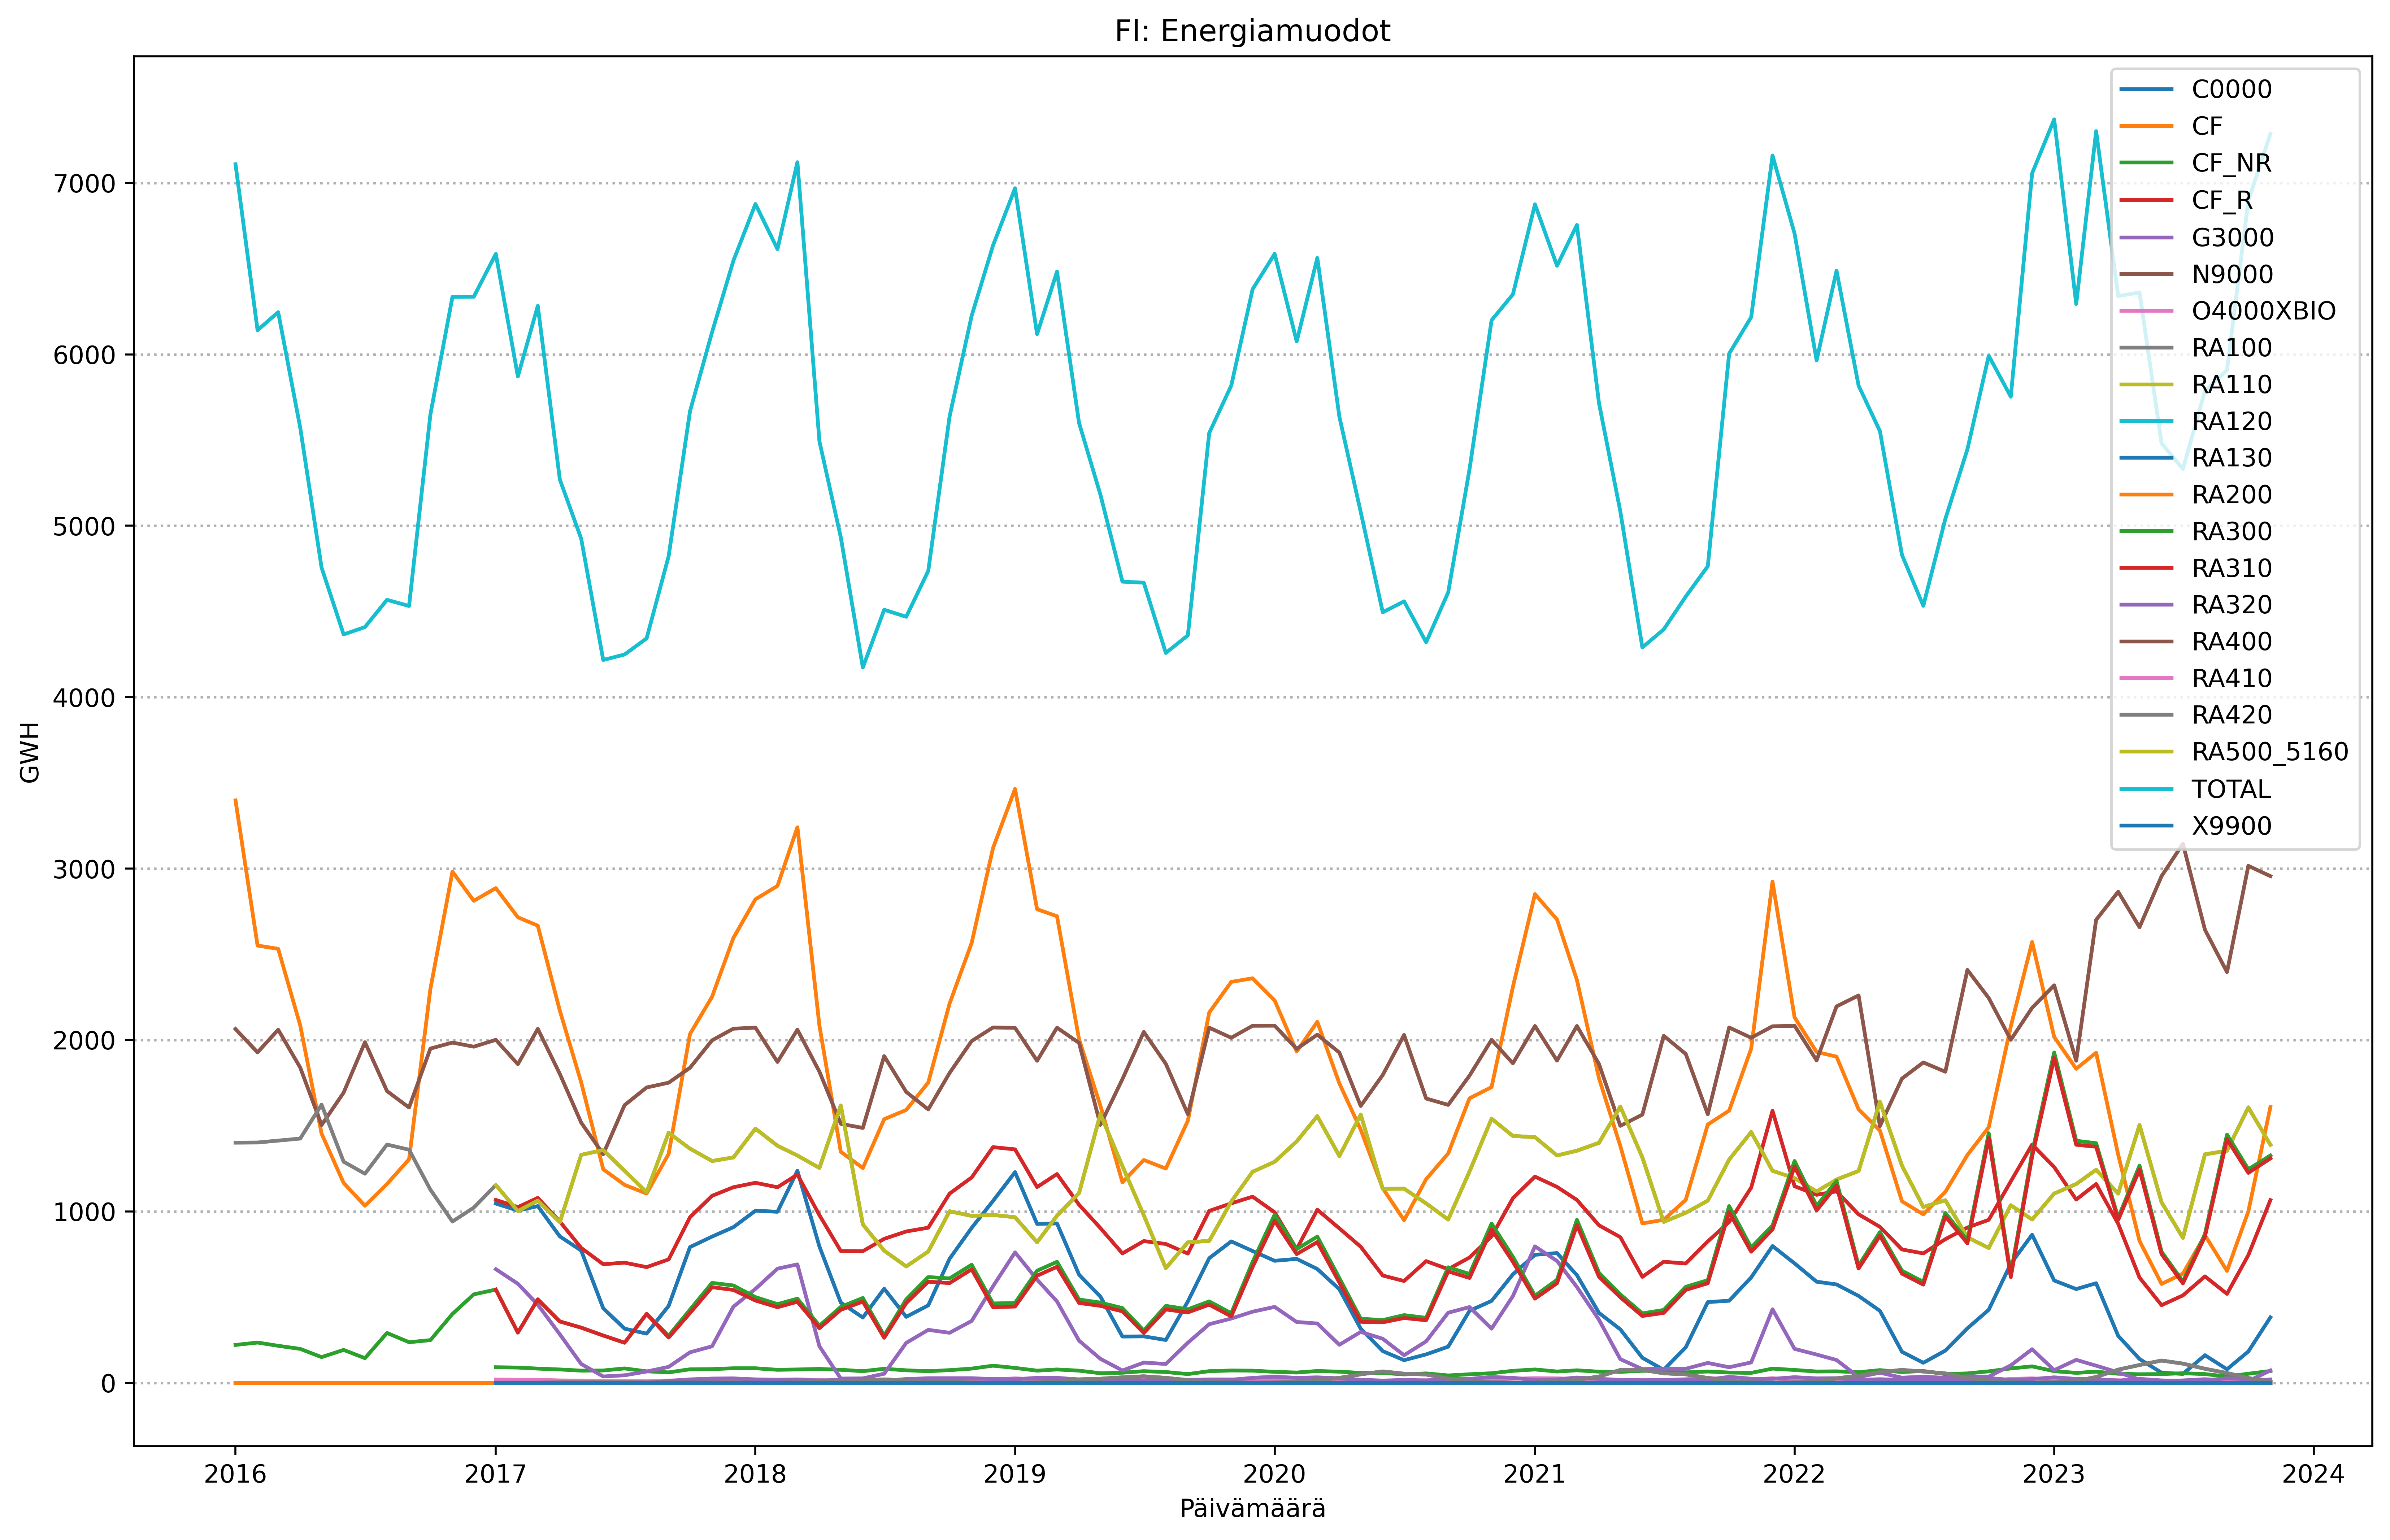

In [ ]:
s = {"C0000": "Coal and manufactured gases", "CF": "Combustible fuels", "CF_NR": "Combustible fuels - non-renewable", "CF_R": "Combustible fuels - renewable", "G3000": "Natural gas", "N9000": "Nuclear fuels and other fuels n.e.c.", "O4000XBIO": "Oil and petroleum products (excluding biofuel portion)", "RA100": "Hydro", "RA110": "Pure hydro power", "RA120": "Mixed hydro power", "RA130": "Pumped hydro power", "RA200": "Geothermal", "RA300": "Wind", "RA310": "Wind on shore", "RA320": "Wind off shore", "RA400": "Solar", "RA410": "Solar thermal", "RA420": "Solar photovoltaic", "RA500_5160": "Other renewable energies", "TOTAL": "Total", "X9900": "Other fuels n.e.c."}


plt.figure(figsize=(16,10), dpi=500)

for i in maa_data["siec"].unique():
    plt.plot(maa_data.loc[maa_data["siec"] == i].TIME_PERIOD, maa_data.loc[maa_data["siec"] == i].OBS_VALUE, label=i)

plt.legend()
plt.grid( linestyle=':', linewidth=1, axis="y")
plt.gca().set(title=f"{maa}: Energiamuodot", xlabel="Päivämäärä",ylabel="GWH")